In [20]:
import torch
import torchvision
import torchvision.transforms as tr
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt

In [21]:
train_images = np.random.randint(256, size=(100,32,32,3))/255
train_labels = np.random.randint(2, size=(100,1))

In [51]:
class ToTensor:
    def __call__(self, sample):
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs)
        inputs = inputs.permute(2,0,1)
        return inputs, torch.LongTensor(labels)





In [52]:
class CutOut:
    def __init__(self, ratio = .5):
        self.ratio = int(1/ratio)

    def __call__(self, sample):
        inputs, labels = sample
        active = int(np.random.randint(0,self.ratio, 1))

        if active == 0:
            _, w, h = inputs.size()
            min_len=min(w,h)
            box_size = int(min_len // 4)
            idx = int(np.random.randint(0,min_len - box_size, 1))
            inputs[:, idx:idx+box_size, idx:idx+box_size] = 0

        return inputs, labels



        

In [53]:
class MyDataset(Dataset):
    def __init__(self, x_data, y_data, transform =None):
        self.x_data = x_data
        self.y_data = y_data
        self.transform = transform
        self.len = len(y_data)
        self.tensor = ToTensor()

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]

        if self.transform:
            sample = self.transform(sample)
        else:
            sample = self.tensor(sample)
        return sample
        
    def __len__(self):
        return self.len


        

In [54]:
train_loader1

In [59]:


trans = tr.Compose([ToTensor(), CutOut()])
dataset1 = MyDataset(train_images, train_labels, transform=trans)
train_loader1 = DataLoader(dataset1, batch_size=10, shuffle=True)


images1, labels1 = iter(train_loader1).next()

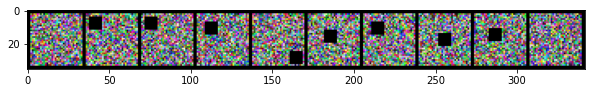

In [60]:
import torchvision


def imshow(img):
    plt.figure(figsize=(10,100))
    plt.imshow(img.permute(1,2,0).numpy())
    plt.show()

imshow(torchvision.utils.make_grid(images1, nrow=10))

In [61]:
class MyTransform:

    def __call__(self, sample):
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs)
        inputs = inputs.permute(2,0,1)
        labels = torch.FloatTensor(labels)

        transf = tr.Compose([tr.ToPILImage(), tr.Resize(128), tr.ToTensor()])
        final_output = transf(inputs)

        return final_output, labels

In [62]:
dataset2 = MyDataset(train_images, train_labels, transform=MyTransform())
train_loader2 = DataLoader(dataset2, batch_size=10, shuffle=True)

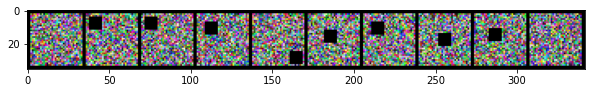

In [64]:

images2, labels2 = iter(train_loader2).next()
def imshow(img):
    plt.figure(figsize=(10,100))
    plt.imshow(img.permute(1,2,0).numpy())
    plt.show()

imshow(torchvision.utils.make_grid(images1, nrow=10))

# pilimage  타입

In [67]:
class CutOut:
    def __init__(self, ratio = .5):
        self.ratio = int(1/ratio)

    def __call__(self, inputs):
       
        active = int(np.random.randint(0,self.ratio, 1))

        if active == 0:
            _, w, h = inputs.size()
            min_len=min(w,h)
            box_size = int(min_len // 4)
            idx = int(np.random.randint(0,min_len - box_size, 1))
            inputs[:, idx:idx+box_size, idx:idx+box_size] = 0

        return inputs


In [68]:
transf = tr.Compose([tr.Resize(128), tr.ToTensor(), CutOut()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform = transf)

Files already downloaded and verified


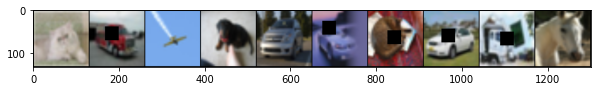

In [69]:
trainloader = DataLoader(trainset, batch_size = 10, shuffle = True)
images, labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(images, nrow=10))